# Load/save and structure data

You will learn to **load and save data** both to and from offline sources (e.g. CSV or Excel). You will learn about **pandas series and dataframes**, and how to clean, rename, structure and index your data.

**Links:**

1. Official [tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html)
2. DataCamp's [pandas' cheat sheet](https://www.datacamp.com/community/blog/python-pandas-cheat-sheet)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Pandas dataframes

In Pandas, the fundamental object of interest is a pandas dataframe. For example:

In [2]:
X = pd.DataFrame(data = [[1,11.7,'Vitus'],[2,13.9,'Maximilian'],[3,14.6,'Bo-Bob']], columns=['id','inc','name'])
X

,id,inc,name
0,1,11.7,Vitus
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


A dataframe is essentially a matrix. 
* rows = observations 
* columns = variables 

In [3]:
X.info() # general information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
id      3 non-null int64
inc     3 non-null float64
name    3 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 152.0+ bytes


**Note:** Show in the middle of some code.

In [4]:
from IPython.display import display
print('before\n')
display(X.head()) # first rows in dataset
print('\n\nafter')

before



,id,inc,name
0,1,11.7,Vitus
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob




after


## Indexing ("subsetting") 

Choosing a subset of the rows and/or columns of a dataframe is known as "indexing". All pandas dataframes are born with the method `.loc[]`.

* `df.loc[:, ['year']]` selects all rows (indicated by `:`) but only the column (variable) `year`. 
* `df.loc[df['year'] == 2002, :]` selects the rows where the variable `year` is equal to 2002 and all columns (indicated by `:`)
* `df.loc[df['year'] == 2002, ['name']]` selects the variable `name` and shows the rows where `year` is equal to 2002. 

In general, the syntax is `df.loc[CONDITION, [VARLIST]]`, where `CONDITION` is a vector of logical statements with the same length as the number of rows in the dataframe. 

In [5]:
X.loc[X['id'] > 1, ['name']]

,name
1,Maximilian
2,Bo-Bob


In [6]:
X.loc[X['id'] > 1] # all variables

,id,inc,name
1,2,13.9,Maximilian
2,3,14.6,Bo-Bob


**Alternatives:**

In [7]:
I = X['id'] > 1 # boolean series
X.loc[I, ['name']]

,name
1,Maximilian
2,Bo-Bob


In [8]:
X.loc[X.id > 1, ['name']] # .VAR notation

,name
1,Maximilian
2,Bo-Bob


## Adding a variable

Variables are added with `df['newvar'] = SOMETHING`.

In [9]:
X['year'] = [2003, 2005, 2010]
X

,id,inc,name,year
0,1,11.7,Vitus,2003
1,2,13.9,Maximilian,2005
2,3,14.6,Bo-Bob,2010


**Note:** You cannot write `df.newvar = SOMETHING`. Some of you will forget. I promise. 

The *something* can be an expression based on other variables.

In [10]:
X['inc_adj'] = X['inc'] / 1.02**(X['year']-2005)
X

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


## Assignments to a subset of rows

Use a logical statement to select a subset of rows. Your RHS must then either be:

* a single value (all rows are set to this) 
* a list of values with same length as the number of selected rows

In [11]:
X

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


In [12]:
Y = X.copy()

Y.loc[Y['id'] > 1, ['name']] = 'test'
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,test,2005,13.90000
2,3,14.6,test,2010,13.22367


In [13]:
Y = X.copy()

Y.loc[(Y['name'] == 'Vitus') | (Y['year'] == 2005), ['name']] = ['Bib', 'Peter']
Y

,id,inc,name,year,inc_adj
0,1,11.7,Bib,2003,12.17268
1,2,13.9,Peter,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


In [14]:
Y = X.copy()

J = (Y['name'] == 'Maximilian') | (Y['year'] == 2010)
Y.loc[J, ['name']] = Y.loc[I, ['name']].values*2 # .values is required
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,MaximilianMaximilian,2005,13.90000
2,3,14.6,Bo-BobBo-Bob,2010,13.22367


## Copies vs. views

The `.loc[]` method returns a **copy**. Therefore the following cell does not work:.

In [15]:
Y = X.copy()

Z = Y.loc[Y['id'] > 1,['name']] # returns a copy
Z = 'test'
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


**Looking** at the data it is natural to do:

In [16]:
Y['name']

0         Vitus
1    Maximilian
2        Bo-Bob
Name: name, dtype: object

In [17]:
Y.name

0         Vitus
1    Maximilian
2        Bo-Bob
Name: name, dtype: object

In [18]:
Y[['id','name']]

,id,name
0,1,Vitus
1,2,Maximilian
2,3,Bo-Bob


In [19]:
Y[Y['id'] > 1]

,id,inc,name,year,inc_adj
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


Importantly, this **does not work with assignment**:

In [20]:
Y = X.copy()

I = Y['id'] > 1
Z = Y['name'] # returns a view (same with Y.name)
Z[I] = 'test'
Y

C:\Users\gmf123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,test,2005,13.90000
2,3,14.6,test,2010,13.22367


In [21]:
Y = X.copy()

I = Y['id'] > 1
Z = Y[['id','name']] # returns a copy
Z.loc[I,['name']] = 'test'
Y

C:\Users\gmf123\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


In [22]:
Y = X.copy()

I = Y['id'] > 1
Z = Y[I] # returns a copy
Z['name'] = 'test'
Y

C:\Users\gmf123\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


## The index

The first column in the dataset is referred to as the `index` of the dataframe. If you haven't done anything, it is just `[0, 1, 2, ....]`.

In [23]:
X.loc[0]

id               1
inc           11.7
name         Vitus
year          2003
inc_adj    12.1727
Name: 0, dtype: object

You can use many other things as indexes. For example the name: 

In [24]:
Y = X.set_index('name') # returns a copy
Y # notice name is now below the other variables

,id,inc,year,inc_adj
name,,,,
Vitus,1,11.7,2003,12.17268
Maximilian,2,13.9,2005,13.90000
Bo-Bob,3,14.6,2010,13.22367


In [25]:
Y.loc['Vitus']

id            1.00000
inc          11.70000
year       2003.00000
inc_adj      12.17268
Name: Vitus, dtype: float64

## Series and numpy arrays

When you select an individual variable, it has the data type `series`. Some functions work on a pandas series (e.g. most numpy functions), but it is sometimes nice to extract the underlying numpy objects: 

* `df`: pandas dataframe 
* `df['variable']`: pandas series 
* `df['variabe'].values` (or `.to_numpy()`): Numpy array

In [26]:
type(X)

pandas.core.frame.DataFrame

In [27]:
type(X[['year','inc_adj']]) # returns a copy

pandas.core.frame.DataFrame

In [28]:
type(X['year']) # returns a view

pandas.core.series.Series

In [29]:
type(X['year'].values) # returns a view

numpy.ndarray

## Calling functions

In [30]:
Y = X.copy()
Y

,id,inc,name,year,inc_adj
0,1,11.7,Vitus,2003,12.17268
1,2,13.9,Maximilian,2005,13.90000
2,3,14.6,Bo-Bob,2010,13.22367


Row-by-row:

In [31]:
def adj_row_by_row(X):
    return X['inc'] / 1.02**(X['year']-2005)

Y['inc_adj_alt1'] = Y.apply(adj_row_by_row,axis=1)

Function for numpy arrays:

In [32]:
def all_at_once(inc,year):
    return inc / 1.02**(year-2005)

Y['inc_adj_alt2'] = all_at_once(Y['inc'].values,Y['year'].values)

Funcion for numpy arrays with inplace changes (i.e. a function without any return statement):

In [33]:
def all_at_once_inplace(inc,year):
    inc[:] = all_at_once(inc,year)

Y['inc_adj_alt3'] = Y['inc']
all_at_once_inplace(Y['inc_adj_alt3'].values,Y['year'].values)

In [34]:
Y # all inc_adj* gives the same result

,id,inc,name,year,inc_adj,inc_adj_alt1,inc_adj_alt2,inc_adj_alt3
0,1,11.7,Vitus,2003,12.17268,12.17268,12.17268,12.17268
1,2,13.9,Maximilian,2005,13.90000,13.90000,13.90000,13.90000
2,3,14.6,Bo-Bob,2010,13.22367,13.22367,13.22367,13.22367


# Reading and writing data

To make sure that we have the "data" subfolder and that it has the datasets we need, we print its contents: 

In [35]:
import os 
os.listdir('data/')

['area.csv',
 'areal.xlsx',
 'INDKP107.xlsx',
 'INDKP107_tall.csv',
 'RAS200.xlsx',
 'RAS200_tall.csv']

## Reading in data

Pandas offers a lot of facilities for reading and writing to different formats. The functions have logical names: 

* CSV: `pd.read_csv()`
* SAS: `pd.read_sas()`
* Excel: `pd.read_excel()`
* Stata: `pd.read_stata()`

Whenever we look at larger dataframes, we will be using `df.head(10)` to inspect the first 10 rows, or `df.sample(10)` to look at 10 random rows (when the first 10 are special, for example). 

In [36]:
# example: raw download from DST
# note: the file must be in a sub folder "data" to the folder where jupyter was launched
filename = 'data/RAS200.xlsx'

In [37]:
pd.read_excel(filename).head(10)

,"Activity and employment rates (end November) by frequency, sex, age, ancestry, region and time",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Units: per cent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
2,Employment rate,Total,"Age, total",Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
3,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
4,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
5,NaN,NaN,NaN,NaN,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
6,NaN,NaN,NaN,NaN,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6
7,NaN,NaN,NaN,NaN,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4
8,NaN,NaN,NaN,NaN,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6
9,NaN,NaN,NaN,NaN,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4


### Getting the right columns and rows

**Skipping rows:** Clearly, we should skip the first three rows and the first four columns

In [38]:
empl = pd.read_excel(filename, skiprows=2)
empl.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Employment rate,Total,"Age, total",Total,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,NaN,NaN,NaN,NaN,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,NaN,NaN,NaN,NaN,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,NaN,NaN,NaN,NaN,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,NaN,NaN,NaN,NaN,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6
5,NaN,NaN,NaN,NaN,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4
6,NaN,NaN,NaN,NaN,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6
7,NaN,NaN,NaN,NaN,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4
8,NaN,NaN,NaN,NaN,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2
9,NaN,NaN,NaN,NaN,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5


**Dropping columns:** The first couple of columns are not needed and contain only missing values (denoted by `NaN` (Not a Number)), so we will drop those. 

In [39]:
drop_these = ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3']
empl.drop(drop_these, axis=1, inplace=True) # axis = 1 -> columns, inplace=True -> changed, no copy made
empl.head(5)

,Unnamed: 4,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6


> **Alternative:** Use `del empl['Unnamed: 0']`.

### Renaming variables

Let's rename the first variable, which is now called `Unnamed: 4`. This is done using `df.rename(columns=dict)`, where dict must be a Python *dictionary*.

In [40]:
empl.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True)

We also see that the employment rate in 2008 has been named `2008`. Having a variable that is named a number can cause problems with some functions (and many other programming languages do not even allow it), so let us change their names. To do so, we need to create a dictionary that maps each of the years {2008, ..., 2016} to {e2008, ..., e2016}. 

In [41]:
myDict = {}
for i in range(2008, 2017): # range goes from 2008 to but not including 2017
    myDict[str(i)] = f'e{i}' 
myDict

{'2008': 'e2008',
 '2009': 'e2009',
 '2010': 'e2010',
 '2011': 'e2011',
 '2012': 'e2012',
 '2013': 'e2013',
 '2014': 'e2014',
 '2015': 'e2015',
 '2016': 'e2016'}

In [42]:
empl.rename(columns = myDict, inplace=True)
empl.head(10)

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,2017
0,All Denmark,76.0,72.8,72.1,71.8,71.3,71.3,71.6,72.1,72.8,73.6
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
2,Province Byen København,73.4,71.0,70.5,70.5,70.4,70.6,70.9,71.6,72.3,73.0
3,Copenhagen,72.5,70.0,69.7,69.6,69.4,69.7,70.0,70.8,71.5,72.2
4,Frederiksberg,75.6,73.7,72.7,72.8,73.0,73.3,73.5,74.0,74.7,75.6
5,Dragør,80.5,78.8,78.5,78.5,78.7,78.7,78.9,78.6,79.2,80.4
6,Tårnby,79.0,76.3,75.4,75.8,75.4,75.8,75.7,76.5,77.4,77.6
7,Province Københavns omegn,77.1,74.2,73.2,73.0,72.4,72.4,72.6,73.3,73.8,74.4
8,Albertslund,73.1,69.2,67.5,67.4,66.5,67.0,67.4,68.7,68.8,70.2
9,Ballerup,75.9,72.9,71.9,72.0,71.4,71.0,71.8,72.8,73.6,74.5


Now we can find the employment rate in the municipality where Anders grew up: 

In [43]:
empl.loc[empl.municipality == 'Lejre']

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,2017
40,Lejre,81.5,79.4,78.3,78.2,77.5,77.4,77.3,78.2,78.6,79.1


### Dropping observations that are not actually municipalities 

The dataset contains observations like "Region Hovedstaden", which is not a municipality so we want to drop such rows. To do this, we can use the `df['var'].str` functionalities, in particular `df['var'].str.contains('PATTERN')`. 

In [44]:
I  = empl.municipality.str.contains('Region')
empl.loc[I, :]

,municipality,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,2017
1,Region Hovedstaden,75.8,73.3,72.6,72.5,72.2,72.3,72.5,73.2,73.8,74.4
36,Region Sjælland,75.7,72.7,71.9,71.6,70.9,71.0,71.3,71.9,72.6,73.3
56,Region Syddanmark,75.7,72.0,71.2,70.7,70.0,70.1,70.5,70.8,71.6,72.5
81,Region Midtjylland,77.0,73.4,72.8,72.4,71.8,71.7,72.2,72.5,73.3,74.1
103,Region Nordjylland,75.2,71.5,71.2,71.0,70.6,70.2,70.3,70.7,71.7,72.2


Delete these rows. 

In [45]:
for val in ['Region', 'Province', 'All Denmark']: 
    I = empl.municipality.str.contains(val)
    empl = empl.loc[I == False] # keep everything else

### Summary statistics 

To get an overview of employments across municipalities we can use the function `df.describe()`. Note that each observation (municipality) is weighted equally. 

In [46]:
empl.describe()

,e2008,e2009,e2010,e2011,e2012,e2013,e2014,e2015,e2016,2017
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,76.629293,73.419192,72.794949,72.591919,72.020202,72.091919,72.431313,72.876768,73.669697,74.463636
std,3.727538,3.626537,3.617062,3.691211,3.804240,3.704484,3.660062,3.647275,3.549690,3.554114
min,62.900000,63.400000,62.400000,61.500000,60.700000,61.200000,61.600000,62.200000,62.600000,63.100000
25%,74.650000,71.350000,70.550000,70.000000,69.450000,69.700000,70.200000,70.750000,71.500000,72.500000
50%,76.800000,73.300000,72.900000,72.600000,72.100000,72.200000,72.600000,73.100000,74.000000,74.600000
75%,79.150000,75.900000,75.200000,75.050000,74.500000,74.500000,74.700000,75.200000,75.700000,76.700000
max,84.000000,81.500000,81.400000,80.500000,80.700000,80.500000,80.900000,81.200000,81.800000,82.200000


We can also just get the mean for each year:

In [47]:
empl.mean()

e2008    76.629293
e2009    73.419192
e2010    72.794949
e2011    72.591919
e2012    72.020202
e2013    72.091919
e2014    72.431313
e2015    72.876768
e2016    73.669697
2017     74.463636
dtype: float64

## Long vs. wide datasets: `pd.wide_to_long()`

Often in economic applications, it can be useful to switch between *wide* vs. *long* formats (long is sometimes referred to as *tall*, e.g. in Stata). 

This is done by the commands `pd.wide_to_long()` (and `pd.long_to_wide()`). 

Many types of analyses are easier to do in one format than in another so it is extremely useful to be able to switch comfortably between formats. 

**Common:** Think of a dataset as having an "ID" and a "PERIOD" variable. In our dataset `empl`, the ID variable is `municipality`, and the period variable is `year`. 

**Wide dataset:** The default from Statistics Denmark: each row corresponds to an ID and there is a variable for each PERIOD. 

**Tall dataset:** There is one row for each combination of (ID, PERIOD). 

In general, Pandas will assume that the variables in the *wide* format have a particular structure: namely they are of the form XPERIOD, where X is called the "stub". In our case, the variable names are e.g. `e2011`, so the stub is `e` and the period (for that variable) is `2011`. 

In [48]:
empl_tall = pd.wide_to_long(empl, stubnames='e', i='municipality', j='year')
empl_tall.head(10)

,,2017,e
municipality,year,,
Copenhagen,2008,72.2,72.5
Frederiksberg,2008,75.6,75.6
Dragør,2008,80.4,80.5
Tårnby,2008,77.6,79.0
Albertslund,2008,70.2,73.1
Ballerup,2008,74.5,75.9
Brøndby,2008,69.4,72.3
Gentofte,2008,76.1,79.2
Gladsaxe,2008,75.3,77.9


**Note:** The variables `municipality` and `year`  are now in the index!! We see that because they are "below" `e` in the `head` overview. 

We can **select a specific municipality** using ``.xs``:

In [49]:
empl_tall.xs('Lejre',level='municipality')

,2017,e
year,,
2008,79.1,81.5
2009,79.1,79.4
2010,79.1,78.3
2011,79.1,78.2
2012,79.1,77.5
2013,79.1,77.4
2014,79.1,77.3
2015,79.1,78.2
2016,79.1,78.6


Or ``.loc[]`` in a special way:

In [50]:
empl_tall.loc[empl_tall.index.get_level_values('municipality') == 'Lejre', :]

2017     e
municipality year            
Lejre        2008  79.1  81.5
             2009  79.1  79.4
             2010  79.1  78.3
             2011  79.1  78.2
             2012  79.1  77.5
             2013  79.1  77.4
             2014  79.1  77.3
             2015  79.1  78.2
             2016  79.1  78.6

We can, alternatively, reset the index, and use `.loc` as normal:

In [51]:
empl_tall = empl_tall.reset_index()
empl_tall.loc[empl_tall.municipality == 'Lejre', :]

,municipality,year,2017,e
32,Lejre,2008,79.1,81.5
131,Lejre,2009,79.1,79.4
230,Lejre,2010,79.1,78.3
329,Lejre,2011,79.1,78.2
428,Lejre,2012,79.1,77.5
527,Lejre,2013,79.1,77.4
626,Lejre,2014,79.1,77.3
725,Lejre,2015,79.1,78.2
824,Lejre,2016,79.1,78.6


**Teaser:** As a quick teaser for what's to come, here's a cute little plot using the builtin pandas plot function. 

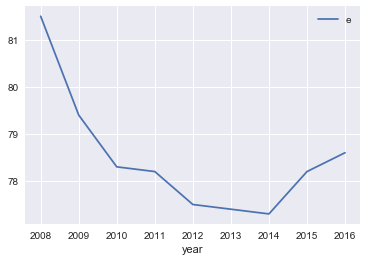

In [52]:
empl_tall.loc[empl_tall['municipality'] == 'Lejre', :].plot(x='year',y='e'); 

We can even do it interactively:

In [53]:
import ipywidgets as widgets
def plot_e(dataframe, municipality): 
    I = dataframe['municipality'] == municipality
    
    ax=dataframe.loc[I,:].plot(x='year', y='e', style='-o', legend='False')

In [54]:
widgets.interact(plot_e, 
    dataframe = widgets.fixed(empl_tall),
    municipality = widgets.Dropdown(description='Municipality', options=empl_tall.municipality.unique(), value='Lejre')
); 

interactive(children=(Dropdown(description='Municipality', index=32, options=('Copenhagen', 'Frederiksberg', '…

## Income

Next, we will read in the avg. disposable income for highly educated in each municipality. Here we do the cleaning, renaming and structuring in a few condensed lines.

In [55]:
# a. load
inc = pd.read_excel('data/INDKP107.xlsx', skiprows=2)

# b. clean and rename
inc.drop([f'Unnamed: {i}' for i in range(4)], axis=1, inplace=True)
inc.rename(columns = {'Unnamed: 4':'municipality'}, inplace=True) # using list comprehension
inc.rename(columns = {str(i): f'inc{i}' for i in range(2004,2018)}, inplace=True) # usinc dictionary comprehension

# c. drop rows with missing
inc.dropna(inplace=True)

# d. remove non-municipalities
for val in ['Region','Province', 'All Denmark']: 
    I = inc.municipality.str.contains(val)
    inc.drop(inc[I].index, inplace=True) # .index -> get the indexes of the series
    
inc.head(5)

,municipality,inc2004,inc2005,inc2006,inc2007,inc2008,inc2009,inc2010,inc2011,inc2012,inc2013,inc2014,inc2015,inc2016,inc2017
3,Copenhagen,233204.0,244462.0,255315.0,254533.0,259216.0,266636.0,297422.0,303717.0,308601.0,316362.0,325070.0,334083.0,327179.0,333579.0
4,Frederiksberg,276111.0,291299.0,305539.0,301547.0,296988.0,304406.0,349249.0,356537.0,363466.0,376072.0,379308.0,397210.0,389151.0,409097.0
5,Dragør,326324.0,330289.0,339630.0,367640.0,371290.0,375508.0,425605.0,471854.0,457410.0,469260.0,482857.0,494313.0,475567.0,490152.0
6,Tårnby,264299.0,273414.0,291735.0,279844.0,288973.0,296610.0,336077.0,368789.0,347705.0,357150.0,359455.0,372565.0,360230.0,373304.0
8,Albertslund,253319.0,260060.0,270290.0,267863.0,269855.0,283067.0,313767.0,308977.0,320298.0,328004.0,334630.0,344447.0,334094.0,332943.0


Convert wide -> tall:

In [56]:
inc_tall = pd.wide_to_long(df=inc, stubnames='inc', i='municipality', j='year')
inc_tall.reset_index(inplace=True)
inc_tall.head(5)

,municipality,year,inc
0,Copenhagen,2004,233204.0
1,Frederiksberg,2004,276111.0
2,Dragør,2004,326324.0
3,Tårnby,2004,264299.0
4,Albertslund,2004,253319.0


## Municipal area

Finally, let's read in a dataset on municipality areas in km$^2$. 

In [57]:
# a. load
area = pd.read_excel('data/areal.xlsx', skiprows=2)

# b. clean and rename
area.rename(columns = {'Unnamed: 0':'municipality','2019':'km2'}, inplace=True)

# c. drop rows with missing
area.dropna(inplace=True)

# d. remove non-municipalities
for val in ['Region','Province', 'All Denmark']: 
    I = area.municipality.str.contains(val)
    area.drop(area[I].index, inplace=True)
    
area.head(5)

,municipality,km2
2,Copenhagen,86.7
3,Frederiksberg,8.7
4,Dragør,18.3
5,Tårnby,66.1
6,Albertslund,23.4


## Writing data

As with reading in data, we have the corresponding functions:

* df.to_csv()
* df.to_excel()
* df.to_stata()
* df.to_sas()
* df.to_parquet() 

Let's save our dataset to CSV form. We will set `index=False` to avoid saving the index (which does not mean anything here but can in other contexts be an annoying thing). 

In [58]:
empl_tall.to_csv('data/RAS200_tall.csv', index=False)

In [59]:
inc_tall.to_csv('data/INDKP107_tall.csv', index=False)

In [60]:
area.to_csv('data/area.csv', index=False)

# Summary

**This lecture**: We have discussed

1. The generel pandas framework (indexing, assigment, copies vs. views, functions)
2. Loading and saving data
3. Basic data cleaning (renaming, droping etc.)
4. Wide $\leftrightarrow$ long transformations

**Next lecture:** Basic data analysis.